1. State space model

H = 1 / s(s+1)

In [50]:
import mbrtc
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

tel =     [1]
noem = [1, 1, 0]

H = signal.tf2ss(tel,noem)

A, B, C, D = H

print("==============Matrixes================")
print("A:",A)
print("B:",B)
print("C:",C)
print("D:",D)


==============Matrixes================
A: [[-1. -0.]
 [ 1.  0.]]
B: [[1.]
 [0.]]
C: [[0. 1.]]
D: [[0.]]


2. Simuleer Step en Impulse Response

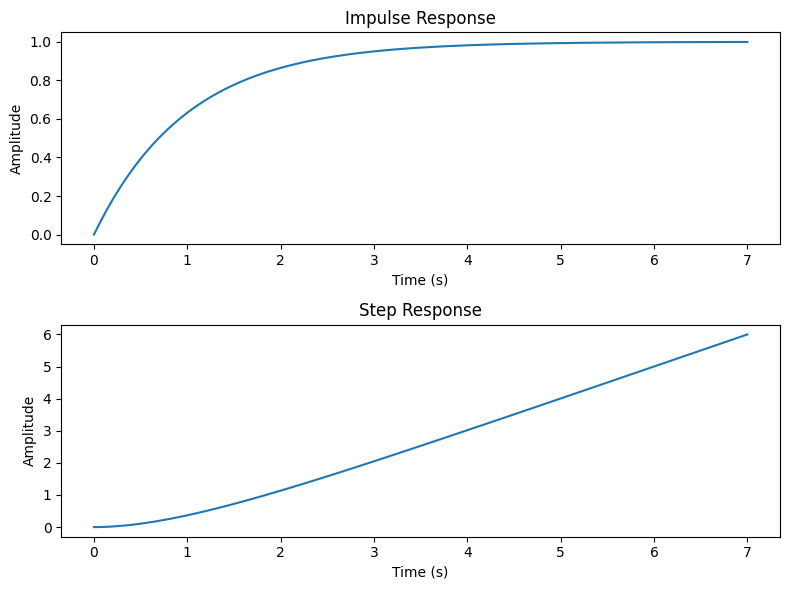

In [51]:

impulseResponse, it = signal.impulse(H)
stepResponse, st = signal.step(H)

fig, axs = plt.subplots(2,1,figsize = (8,6))
axs[0].plot(impulseResponse, it)
axs[0].set_title("Impulse Response")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(stepResponse, st)
axs[1].set_title("Step Response")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

3. De polen zijn 0 en -1, dit is te halen uit de H(s). Hierbij zijn geen complexe polen

4. Wat is een goeie timesample voor H?

We stellen dat het een eerste orde systeem is waarbij we de formule: h = Tr / Nr => h = 1/3 



5. Discreetiseer het systeem

In [52]:
Tr = 1
Nr = 3
h = Tr / Nr  #6
print("h: ", h)
discreetSystem = signal.cont2discrete(H,h)

print("==============Matrixes================")
print("A: ", discreetSystem[0])
print("B: ", discreetSystem[1])
print("C: ", discreetSystem[2])
print("D: ", discreetSystem[3])

h:  0.3333333333333333
==============Matrixes================
A:  [[0.71653131 0.        ]
 [0.28346869 1.        ]]
B:  [[0.28346869]
 [0.04986464]]
C:  [[0. 1.]]
D:  [[0.]]


6. Simuleer impuls en step met MRBTC

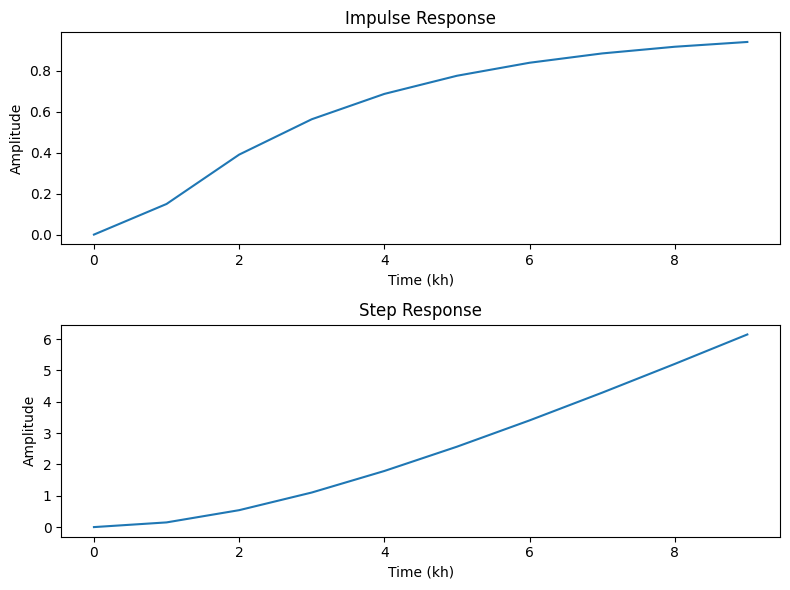

In [53]:
Ad, Bd, Cd, Dd, _ = discreetSystem

u = np.zeros(10)
u[0] = 1/h
impulseResponse = mbrtc.sim(Ad,Bd,Cd,Dd,u)

u = np.full(10,1/h)
stepResponse = mbrtc.sim(Ad,Bd,Cd,Dd,u)

fig, axs = plt.subplots(2,1,figsize = (8,6))
axs[0].plot(impulseResponse)
axs[0].set_title("Impulse Response")
axs[0].set_xlabel("Time (kh)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(stepResponse)
axs[1].set_title("Step Response")
axs[1].set_xlabel("Time (kh)")
axs[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

7. voer een similariteitstransformatie uit met de similariteits matrix:

T = [[1,  1],[1, -1]]

==============Matrixes================
~A: 
  [[ 1.          0.        ]
 [-0.28346869  0.71653131]]
~B: 
  [[0.33333333]
 [0.23360405]]
~C: 
 [[ 0.5 -0.5]]
~D: 
 [[0.]]
================Poles=================
Pool  1 :  1.0
Pool  2 :  0.717


c:\Users\daans\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


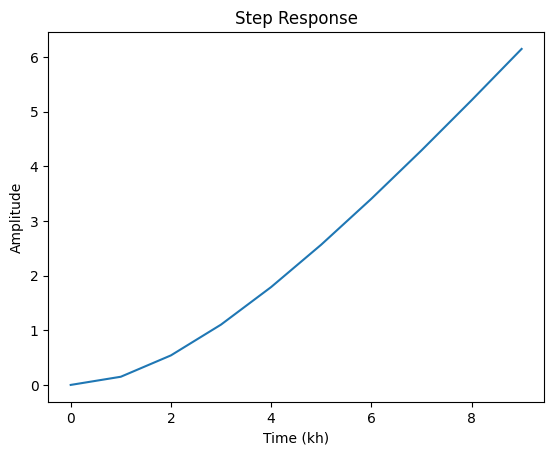

In [54]:
T = np.matrix([[1,1],[1,-1]])

dtA = T @ Ad @ np.linalg.inv(T)
dtB = T @ Bd
dtC =     Cd @ np.linalg.inv(T)
dtD =     Dd

print("==============Matrixes================")

print("~A: \n ", dtA)
print("~B: \n ", dtB)
print("~C: \n", dtC)
print("~D: \n", dtD)

u = np.full(10,1/h)
stepResponse = mbrtc.sim(dtA,dtB,dtC,dtD,u)

plt.plot(stepResponse.reshape(-1,1))
plt.title("Step Response")
plt.xlabel("Time (kh)")
plt.ylabel("Amplitude")


system = signal.StateSpace(dtA,dtB,dtC,dtD)
p = system.poles
i = 1
print("================Poles=================")
for pole in p:
    print("Pool ",i,": ", round(pole,3))
    i += 1






8. Gebruik de **sim_intersample** funcie

Text(0, 0.5, 'Amplitude')

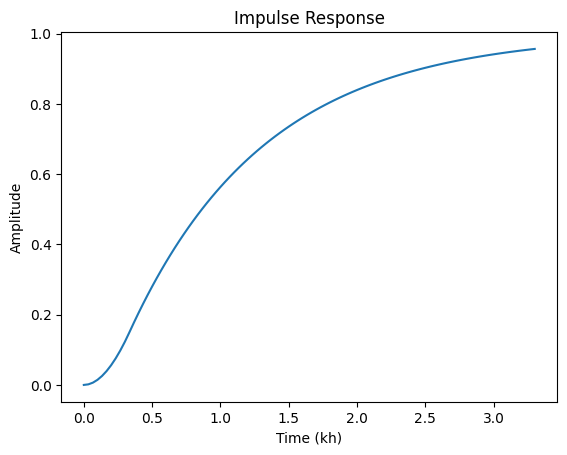

In [55]:

N = 10
u = np.zeros(N)
u[0] = 1/h
td = h*np.arange(N) 

y, t = mbrtc.sim_intersample(A,B,C,D,h,N,u,td)

plt.plot(y,t)
plt.title("Impulse Response")
plt.xlabel("Time (kh)")
plt.ylabel("Amplitude")
